In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

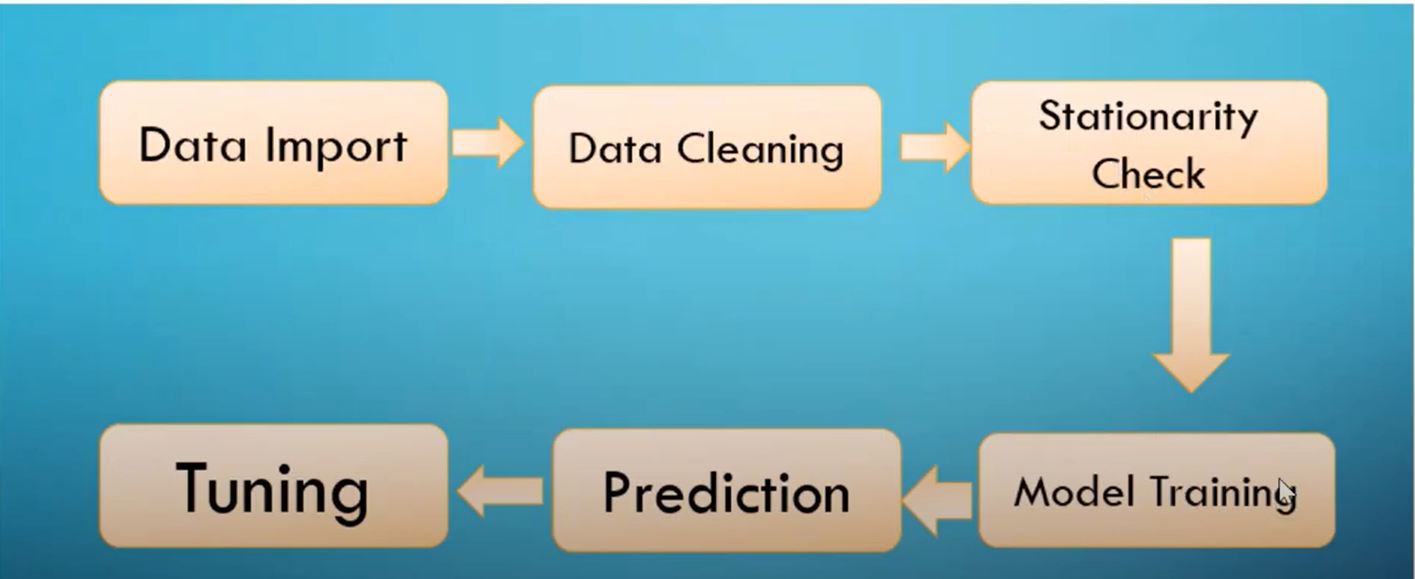

In [2]:
from IPython.display import Image
Image(filename='C:/Users/120761/Pictures/Screenshots/tsa.png')

In [4]:
data=pd.read_csv('C:/Users/120761/Documents/PyScripts/ova1.csv',index_col=[0],parse_dates=True,squeeze=True)

In [6]:
type(data)

pandas.core.series.Series

<AxesSubplot:xlabel='Period'>

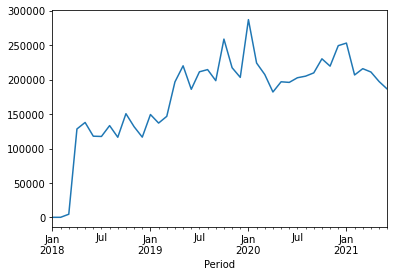

In [8]:
data.plot()

In [12]:
data_ma_mean=data.rolling(window=10).mean()
data_ma_std= data.rolling(window=10).std()

<AxesSubplot:xlabel='Period'>

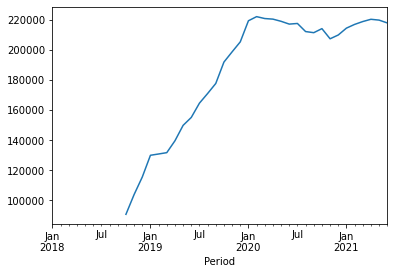

In [13]:
data_ma.plot()

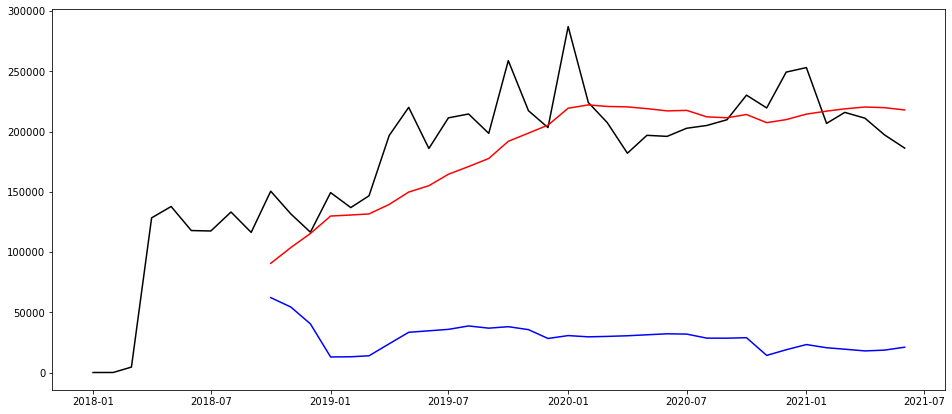

In [14]:
plt.figure(figsize=(16,7))
fig=plt.figure(1)
origin=plt.plot(data,color='black',label='Original')
mean=plt.plot(data_ma_mean,color='red',label='rollingmean')
std=plt.plot(data_ma_std,color='blue',label='rollingstd')
plt.show()

In [ ]:
#so the above chart shows the Mean & variance is not constant...... by seeing it we can say there is some deviations in the line

#so making it as Stationary we are going to other techniques in belows

# Transformation Techniques to make series as STATIONARY

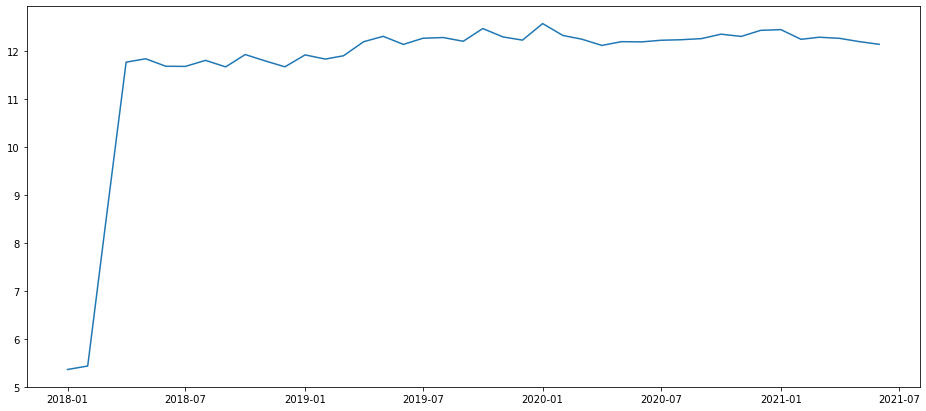

In [16]:
plt.figure(figsize=(16,7))

data_log=np.log(data)
plt.plot(data_log)

In [17]:
#ADF Test to see data whether it is STATIONARY or not

from statsmodels.tsa.stattools import adfuller

In [24]:
import pandas as pd
import numpy as np

In [25]:
dataa=pd.read_csv('C:/Users/120761/Documents/PyScripts/ova1.csv')

In [28]:
dataa.shape

(42, 2)

In [29]:
dataa.columns

Index(['Period', 'Orders'], dtype='object')

In [34]:
X=dataa["Orders"].values
result=adfuller(X)
print('ADFstats :%f' %result[0])
print('p-value :%f' %result[1])
print('critical values:')
for key,value in result[4].items():
    print('\t%s: %.3f' %(key,value))
    
if result[0]<result[4]['5%']:
    print("time series is stationary")
else:
    print("time series is not stationary")



ADFstats :-2.177509
p-value :0.214509
critical values:
	1%: -3.616
	5%: -2.941
	10%: -2.609
time series is not stationary


In [35]:
adfuller_test=adfuller(dataa.Orders.values,autolag='AIC')
print('adf statistics',adfuller_test[0])
print('p-val',adfuller_test[1])

adf statistics -2.1775089812669792
p-val 0.2145094192017699


In [1]:
#decomposition technique again

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition=seasonal_decompose(dataa['Orders'],period=1,model='additivie')

trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid

plt.figure(figsize=(16,7))
fig=plt.figure(1)

plt.subplot(411)
plt.plot(data_log,label='original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='seasonall')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='resid')
plt.legend(loc='best')

NameError: name 'dataa' is not defined

In [ ]:
#differencing technique

data_log_diff=data_log-data_log.shift()
plt.plot(data_log_diff)

#determmining Rollingstats.
rollmean=data_log_diff.rolling(12).mean
rollstd=data_log_diff.rolling(12).std




TypeError: float() argument must be a string or a number, not 'method'

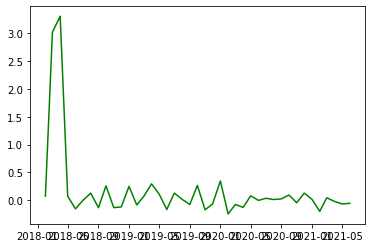

In [62]:
#ploting roling stats:we can chck whthere data is stationary or not

origin=plt.plot(data_log_diff,color='green',label='original')
means=plt.plot(rollmean,color='red',label='mean')
stds=plt.plot(rollstd,color='black',label='std')
plt.show()

In [68]:
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf


In [69]:
lag_acf=acf(data_log_diff,nlags=10)
lag_pacf=pacf(data_log_diff,nlags=10)

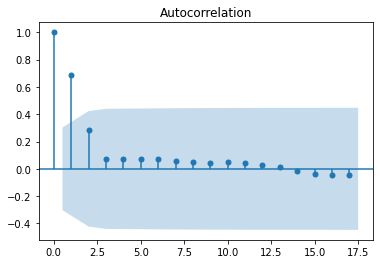

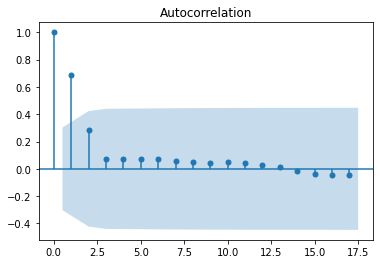

In [76]:
plot_acf(data_log)

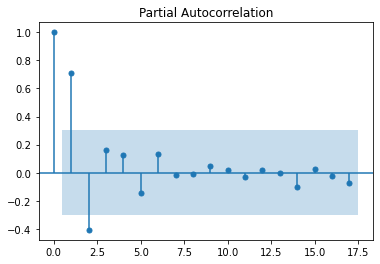

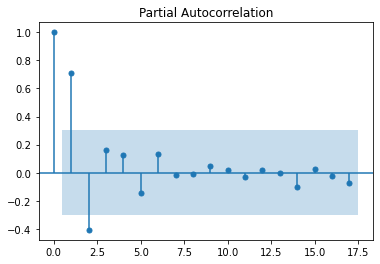

In [77]:
plot_pacf(data_log)

In [78]:
#now starting Forecasting using ARIMA

from statsmodels.tsa.arima_model import ARIMA

C:\Users\120761\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\120761\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS 

TypeError: float() argument must be a string or a number, not 'ARMAResultsWrapper'

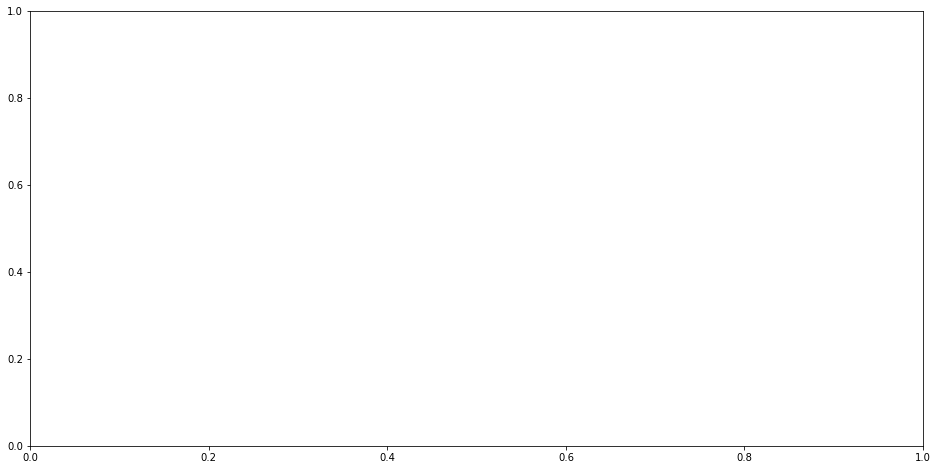

In [82]:
plt.figure(figsize=(16,8))
model=ARIMA(data_log,order=(1,0,1))
result_model=model.fit(disp=-1)
plt.plot(result_model,color='red')